In [1]:
import pandas as pd
import numpy as np
import copy
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
import nltk
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import re, joblib
import konlpy
from konlpy.tag import Okt 
okt = Okt()
import string
import threading

In [2]:
os.chdir('/home/miwoos/WorkSpace/GoogleDrive/넥스트이지!!/')

In [4]:
df = pd.read_csv('/home/miwoos/WorkSpace/GoogleDrive/넥스트이지!!/골프장네이버크롤링.csv')

In [6]:
df.head(3)

,제목,날짜,내용,href,골프장명
0,제주도 골프장 제주 그린필드CC 가성비 부킹 예약 라운드 괜찮음!,2021.08.19,비오는날 가봤던 제주도 골프장 제주 그린필드CC 부킹 예약 라운드 후기 입니다. 제...,https://blog.naver.com/ufohaw0359/222476351752,그린필드CC
1,감탄했던 제주 그린필드cc 맛집,2022.02.07,친구들과 떠난 제주 여행에서 들린 제주 그린필드cc 맛집 바다풍경횟집 소개해드릴께요...,https://blog.naver.com/ogiya8282/222638917594,그린필드CC
2,"제주도 골프장 그린필드cc 2인 라운딩 후기, 제주 골프 여행 예약은 골프부킹황제",2021.09.22,있는 그린필드 컨트리클럽에서 와이프와 2인 라운딩을 즐길 수 있었습니다. 가성비 좋...,https://blog.naver.com/double_bogey/222513188289,그린필드CC


In [20]:
userwant = df.내용.copy()
userwant.dropna(inplace=True)
userwant.reset_index(inplace=True,drop=True)
userwant_list=userwant.values


sum_list = []
for i in range(len(userwant_list)):
    sum_list+=userwant_list[i].replace(string.punctuation,'').split(' ')
len(sum_list)


68083

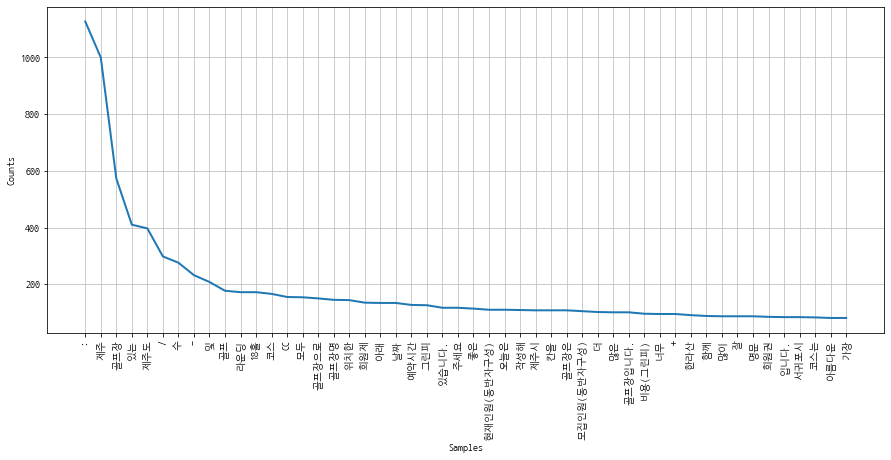

<Figure size 432x288 with 0 Axes>

In [21]:
golf_use = nltk.Text(sum_list, name='내용')
plt.figure(figsize=(15,6))
golf_use.plot(50)
plt.show()
plt.savefig('빈도수파악골프장리뷰네이버.png')

In [23]:
data = golf_use.vocab().most_common(300)
data[10:]

[('라운딩', 172),
 ('18홀', 172),
 ('코스', 166),
 ('CC', 155),
 ('모두', 154),
 ('골프장으로', 150),
 ('골프장명', 145),
 ('위치한', 144),
 ('회원제', 135),
 ('아래', 134),
 ('날짜', 134),
 ('예약시간', 127),
 ('그린피', 126),
 ('있습니다.', 117),
 ('주세요', 117),
 ('좋은', 114),
 ('현재인원(동반자구성)', 110),
 ('오늘은', 110),
 ('작성해', 109),
 ('제주시', 108),
 ('칸을', 108),
 ('골프장은', 108),
 ('모집인원(동반자구성)', 105),
 ('더', 102),
 ('많은', 101),
 ('골프장입니다.', 101),
 ('비용(그린피)', 96),
 ('너무', 95),
 ('+', 95),
 ('한라산', 91),
 ('함께', 88),
 ('많이', 87),
 ('잘', 87),
 ('명문', 87),
 ('회원권', 85),
 ('입니다.', 84),
 ('서귀포시', 84),
 ('코스는', 83),
 ('아름다운', 81),
 ('가장', 81),
 ('2인', 78),
 ('주중', 78),
 ('오늘', 78),
 ('제주의', 77),
 ('라운딩을', 76),
 (',', 76),
 ('중', 76),
 ('는', 75),
 ('이', 75),
 ('36홀', 75),
 ('캐슬렉스', 74),
 ('한', 73),
 ('정말', 70),
 ('코스로', 70),
 ('1박2일', 70),
 ('cc', 70),
 ('있어', 70),
 ('총', 69),
 ('바로', 67),
 ('골프장이', 66),
 ('대중제', 66),
 ('골프장을', 65),
 ('그리고', 65),
 ('#제주도골프장', 65),
 ('가능한', 63),
 ('하고', 62),
 ('주말', 62),
 ('엘리시안', 62),
 ('27홀', 60),
 ('■

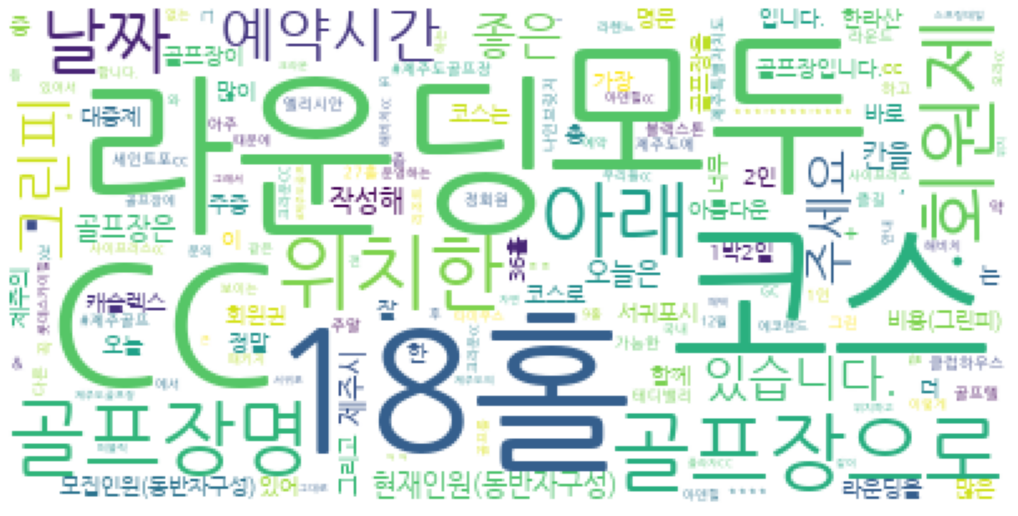

<Figure size 432x288 with 0 Axes>

In [24]:
wc = WordCloud(
    font_path='NanumGothic.ttf',
    relative_scaling=0.00001,
    background_color='white'
).generate_from_frequencies(dict(data[10:]))

plt.figure(figsize=(18,12))
plt.imshow(wc)
plt.axis('off')
plt.show()
plt.savefig('golf_usewordcloud.png')